## Langevin equation: harmonic and FENE potentials

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### a) Solve the Langevin equations numerically

In [135]:
GAMMA = 1/10**-8 #s
M = 10**-17 #kg
V_TH = 0.02 #m/s
W0 = 0.1*GAMMA
R0 = v_th/w0
K = np.power(0.1*GAMMA, 2) * m

p_0 = 1*m
r_0 = 0 
t_span = 10**-4
dt = (10**-2)*(1/gam)

100000000.0


In [139]:
parameters = {
    'gamma': GAMMA,
    'm': M,
    'v_th': V_TH,
    'w0': W0,
    'r0': R0,
    'k': K
}

{'gamma': 100000000.0, 'm': 1e-17, 'v_th': 0.02, 'w0': 10000000.0, 'r0': 2e-09, 'k': 0.001}


In [142]:
class Langevin():
    def __init__(self, parameters, pot_method='harmonic'):
        self.gamma = parameters['gamma']
        self.m = parameters['m']
        self.v_th = parameters['v_th']
        self.w0 = parameters['w0']
        self.r0 = parameters['r0']
        self.k = parameters['k']
        self.pot_method = pot_method
        self.r, self.p = None, None
        self.num_steps = None
    
    def __harmonic_pot_deriv(self, r):
        return self.k*r
    
    def __fene_pot_deriv(self, r):
        return (k*self.r0) / (1 - np.power(r/self.r0, 2))
    
    def __euler_maruyama(self, deriv_pot, t_span, dt, p_0, r_0=0):
        r = [r_0, ]
        p = [p_0, ]

        self.num_steps = np.linspace(0, t_span, int(t_span/dt)+1)

        for i in range(1, len(self.num_steps)):
            r.append(r[i-1] + p[i-1]*dt/self.m)
            p.append(p[i-1] - deriv_pot(r[i-1])*dt - self.gamma*p[i-1]*dt + np.sqrt(2*self.gamma*dt)*self.v_th*self.m*np.random.normal(0,1))

        return np.array(r), np.array(p)
    
    def solve(self, t_span, dt, p_0, r_0):
        if (self.pot_method == 'harmonic'):
            self.r, self.p = __euler_maruyama(__harmonic_pot_deriv, t_span, dt, p_0, r_0=0) 
        
        elif (self.pot_method == 'fene'):
            self.r, self.p = __euler_maruyama(__fene_pot_deriv, t_span, dt, p_0, r_0=0)
    
        return self
    
    def plot(self,):
        t = self.num_steps
        
        plt.subplot(3, 1, 1)
        plt.plot(t, self.r)
        plt.title('Position')
        plt.xlabel('time (s)')
        plt.ylabel('r(t)')

        plt.subplot(3, 2, 1)
        plt.plot(t, self.p)
        plt.title('Momentum')
        plt.xlabel('time (s)')
        plt.ylabel('p(t)')
        
        plt.subplot(3, 3, 1)
        plt.plot(self.r, self.p, )
        plt.title('Phase spce trajectory for {} potential'.format(self.pot_method))
        plt.xlabel('r(t)')
        plt.ylabel('p(t)')

        plt.show()

In [3]:
def harmonic_pot_deriv(r):
    return k*r

In [4]:
def fene_pot_deriv(r):
    return (k*r0) / (1 - np.power(r/r0, 2))

In [28]:
def euler_maruyama(deriv_pot, t_span, dt, p_0, r_0=0):
    r = [r_0, ]
    p = [p_0, ]
    
    num_steps = np.linspace(0, t_span, int(t_span/dt)+1)
    
    for i in range(1, len(num_steps)):
        r.append(r[i-1] + p[i-1]*dt/m)
        p.append(p[i-1] - deriv_pot(r[i-1])*dt - gam*p[i-1]*dt + np.sqrt(2*gam*dt)*v_th*m*np.random.normal(0,1))
    
    return np.array(r), np.array(p)

In [29]:
gam = 1/10**-8 #s
m = 10**-17 #kg
v_th = 0.02 #m/s
w0 = 0.1*gam
r0 = v_th/w0
p_0 = 1*m
k = np.power(0.1*gam, 2) * m
print(gam)

100000000.0


In [30]:
t_span = 10**-4
dt = (10**-2)*(1/gam)

In [31]:
print(t_span)
print(dt)

0.0001
1e-10


In [116]:
r, p = euler_maruyama(harmonic_pot_deriv, t_span, dt, p_0)

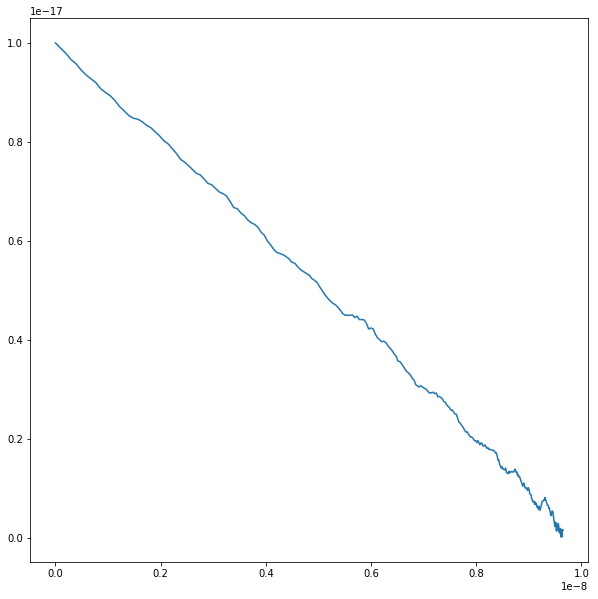

4e-08


In [106]:
t= np.linspace(0, t_span, int(t_span/dt)+1)
plt.figure(figsize=(10,10))
# plt.plot(r[500:2000],p[500:2000])
# plt.plot(t[300:600], p[300:600])
# plt.plot(t[0:1000],p[0:1000])
# plt.plot(t[0:50000],r[0:50000])

plt.plot(r[0:400], p[0:400])
# plt.plot(t, r)
# plt.plot(t, r)
plt.show()
print(t[400])

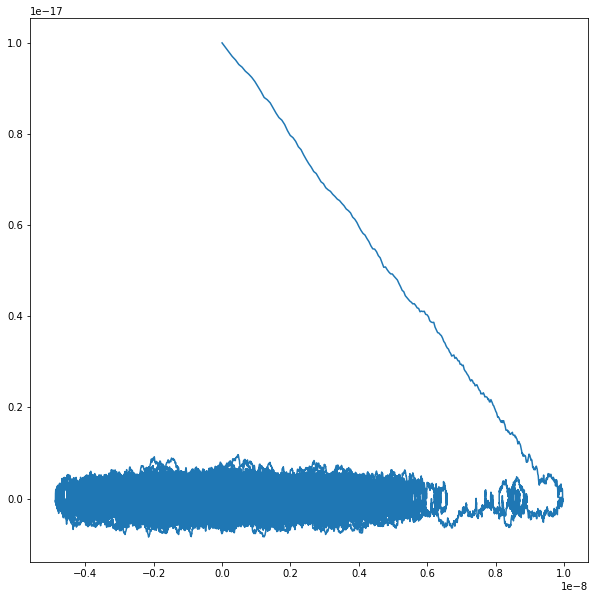

In [54]:
r, p = euler_maruyama(fene_pot_deriv, t_span, dt, p_0)
plt.figure(figsize=(10,10))
plt.plot(r[], p[])
# plt.plot(t, r)
plt.show()

## b)

In [112]:
t_eq = t[400] #4*10**-8 s = 40ns
print(t_eq)

4.0000000000000003e-07


In [119]:
def rms(r):
    return np.sqrt(np.mean(np.power(r, 2)))

In [120]:
def kinetic_energy(p, m):
    return np.mean(np.power(p, 2))/2*m

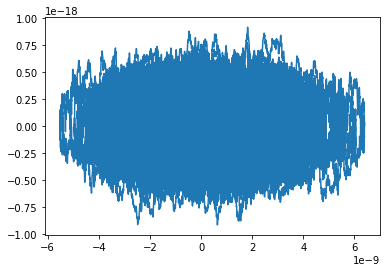

In [117]:
r_lim = r[4000:]
p_lim = p[4000:]
plt.plot(r_lim, p_lim)
plt.show()

In [121]:
l = rms(r_lim)
print(l)

1.9092365114720406e-09


In [123]:
E_kin = kinetic_energy(p_lim, m)
print(E_kin)

2.0022657249659547e-55


## c)